In [120]:

# Import Important Lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics  import roc_auc_score,accuracy_score

In [154]:
# Read and combine Test and Train Data
test_data = pd.read_csv(r'C:\Users\Rohit Gupta\Desktop\ML Competitions\Loan Prediction Analytics Vidhya\test.csv') # loading the test data
train_data = pd.read_csv(r'C:\Users\Rohit Gupta\Desktop\ML Competitions\Loan Prediction Analytics Vidhya\train.csv') # loading the test data

train_data.shape
test_data.shape
raw_data = train_data.copy()
raw_data = raw_data.append(test_data, sort = False)
raw_data.reset_index(inplace = True)

In [3]:
#understanding Data
train_data.head()
#train_data.tail()
#train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [11]:
raw_data.isna().sum().sort_values() #Count null values for each column



index                  0
Loan_ID                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
Property_Area          0
Married                3
Loan_Amount_Term      20
Gender                24
Dependents            25
LoanAmount            27
Self_Employed         55
Credit_History        79
Loan_Status          367
dtype: int64

In [122]:
#Dropping Column Loan_ID
raw_data = raw_data.drop(['Loan_ID','index'], axis =1)
train_data = train_data.drop(['Loan_ID'], axis =1)


In [4]:
#Checking number of rows with more than 2 null values
x = raw_data.isnull().sum(axis=1)
m =[]
for i in range(len(x)):
    if(x[i]>=2):
        m.append(i)

len(m)


91

In [123]:
raw_data2.isna().sum().sort_values() #Count null values for each column


Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [124]:
# Univariate analysis: Target Variable
train_data['Loan_Status'].value_counts(normalize =True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

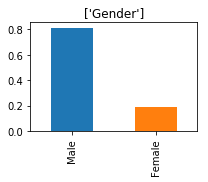

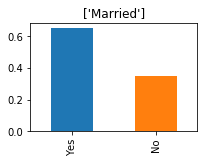

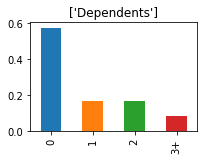

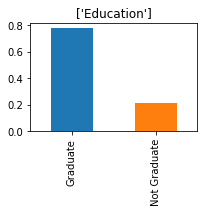

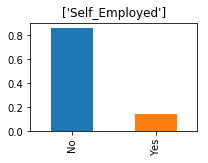

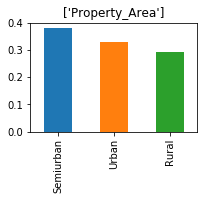

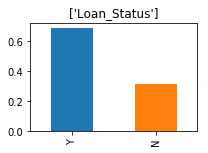

In [125]:
# Univariate analysis : Categorical Variables
categorical_features = train_data.select_dtypes(include=[np.object])


for columns in categorical_features:
    fig =plt.figure(figsize = (3, 2))
    ax = fig.add_subplot()
    col_name =str([columns])
    train_data[columns].value_counts(normalize =True).plot.bar(title = col_name)


D:\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


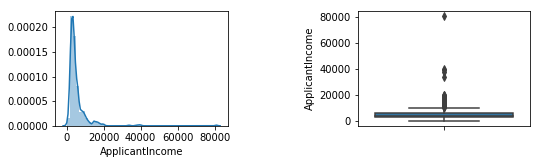

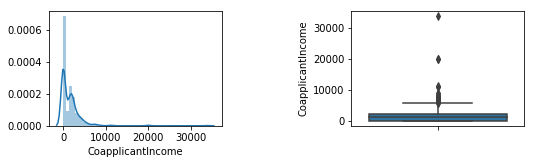

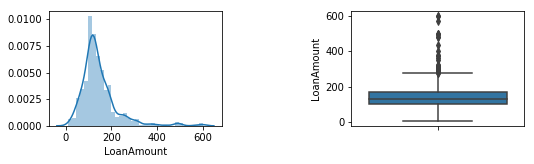

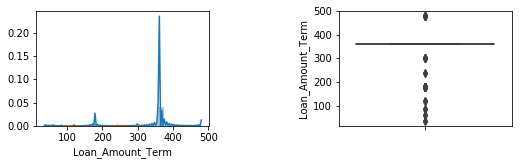

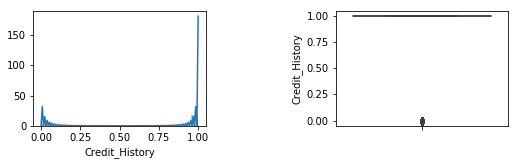

In [126]:
# Univariate analysis : NUmerical Variables

train_data2 = train_data.dropna()
numerical_features = train_data2.select_dtypes(include=[np.number])
for columns in numerical_features:
    fig =plt.figure()
    axes1 =fig.add_axes([0.1,0.1,0.4,0.4])
    sns.distplot(numerical_features[columns])
    axes2 = fig.add_axes([0.8,0.1,0.4,0.4])
    sns.boxplot(numerical_features[columns], orient ="v")
    


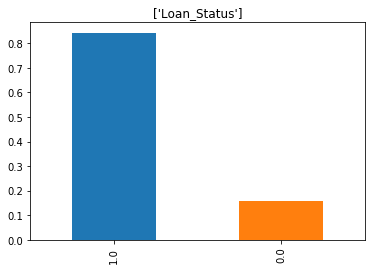

In [84]:
train_data['Credit_History'].value_counts(normalize =True).plot.bar(title = col_name)


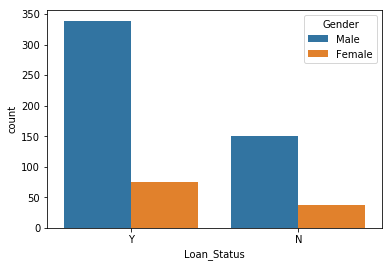

In [95]:
#Bivariate Analysis:Gender
sns.countplot(x ='Loan_Status',hue ='Gender',data = train_data) 

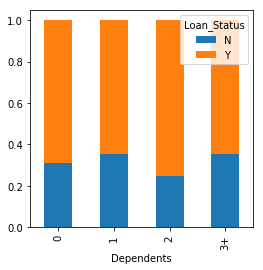

In [158]:
#Bivariate Analysis: categorical Varibales
Gender = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind ="bar", stacked = True, figsize= (4,4))


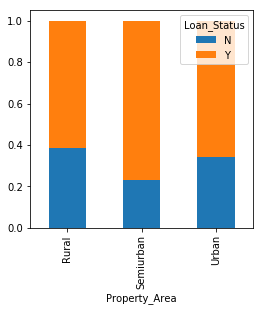

In [126]:
#Bivariate Analysis: categorical Varibales

Gender = pd.crosstab(train_data['Property_Area'], train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind ="bar", stacked = True, figsize= (4,4))


D:\Softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


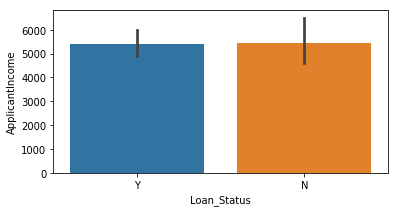

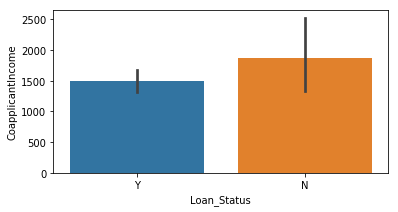

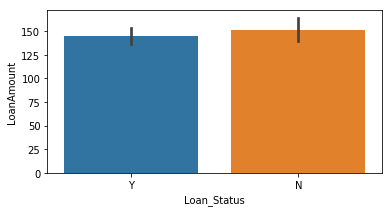

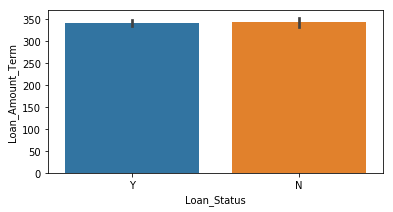

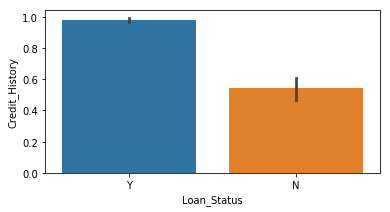

In [134]:
#Bivariate Analysis: Numerical Varibales
#Gives the mean of the variables

numeric_features = train_data.select_dtypes(include =[np.number])


def scatterplots(col):
    fig = plt.figure(figsize = (6, 3))      
    ax = fig.add_subplot()
    sns.barplot(x = 'Loan_Status', y = col, data = train_data)
   
for columns in numeric_features:
    scatterplots(columns)

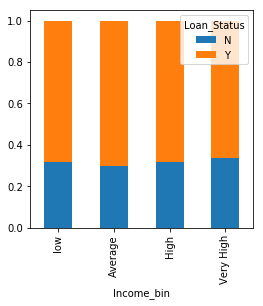

In [15]:
#Bivariate Analysis: Numerical Varibales creating bins,ApplicantIncome

bins = [0,2500,4000,6000,81000]
group =['low','Average','High','Very High']
train_data['Income_bin'] = pd.cut(train_data['ApplicantIncome'],bins,labels=group)

income_bin = pd.crosstab(train_data['Income_bin'], train_data['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind ="bar", stacked = True, figsize= (4,4))



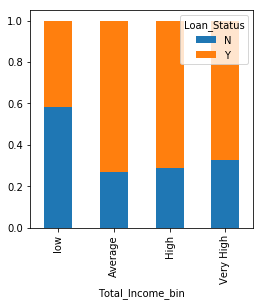

In [19]:
#Bivariate Analysis: Numerical Varibales creating bins,ApplicantIncome

bins = [0,2500,4000,6000,81000]
group =['low','Average','High','Very High']
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['Total_Income_bin'] = pd.cut(train_data['Total_Income'],bins,labels=group)

total_income_bin = pd.crosstab(train_data['Total_Income_bin'], train_data['Loan_Status'])
total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot(kind ="bar", stacked = True, figsize= (4,4))



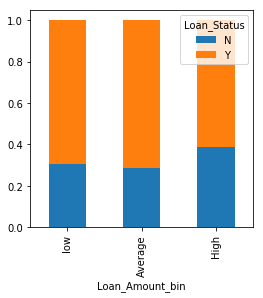

In [21]:
#Bivariate Analysis: Numerical Varibales creating bins,loan_Amount
bins = [0,100,200,700]
group =['low','Average','High']
train_data['Loan_Amount_bin'] = pd.cut(train_data['LoanAmount'],bins,labels=group)

Loan_Amount_bin = pd.crosstab(train_data['Loan_Amount_bin'], train_data['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float),axis=0).plot(kind ="bar", stacked = True, figsize= (4,4))



In [20]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


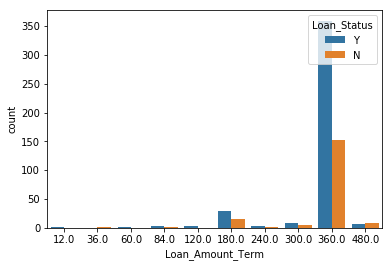

In [23]:
#Bivariate Analysis: Numerical Varibales creating bins,loan_Amount_term
sns.countplot(x = train_data['Loan_Amount_Term'], hue =train_data['Loan_Status'] )


In [24]:
train_data['Loan_Amount_Term'].value_counts(normalize =True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [132]:
# Preparing train and test data : Dropping Columns

train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['Total_Income'] =test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

train_data = train_data.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis =1)
test_data = test_data.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis =1)

print(train_data.columns, "******",test_data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income'],
      dtype='object') ****** Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income'],
      dtype='object')


In [133]:
# Preparing train and test data : Dropping Columns
train_data['Dependents'].replace('3+', 3 , inplace = True)
train_data['Loan_Status'].replace('N', 0 , inplace = True)
train_data['Loan_Status'].replace('Y', 1 , inplace = True)

test_data['Dependents'].replace('3+', 3 , inplace = True)





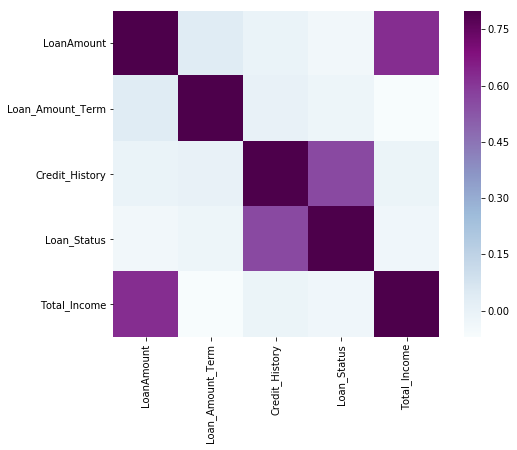

In [68]:
matrix = train_data.corr()
f, ax = plt.subplots(figsize= (9,6))
sns.heatmap(matrix, vmax =0.8, square = True, cmap = "BuPu")

In [134]:
train_data.isna().sum().sort_values()
#train_data.shape

Education            0
Property_Area        0
Loan_Status          0
Total_Income         0
Married              3
Gender              13
Loan_Amount_Term    14
Dependents          15
LoanAmount          22
Self_Employed       32
Credit_History      50
dtype: int64

In [135]:
#Imputing values in Categorical columns
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace = True)


test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace = True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace = True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace = True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace = True)


In [136]:
#Imputing values in Numerical columns
#Since loanAmount has lot of outliers so we use median values
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace = True)


In [137]:
#Separating Features and Target varibale
X = train_data.drop(['Loan_Status'],1)
y = train_data.Loan_Status



In [142]:
print(X.columns," Y Columns :", "Test_data ",test_data.columns)
X

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income'],
      dtype='object')  Y Columns : Test_data  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income'],
      dtype='object')


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,9613.0
6,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,3849.0
7,Male,Yes,3,Graduate,No,158.0,360.0,0.0,Semiurban,5540.0
8,Male,Yes,2,Graduate,No,168.0,360.0,1.0,Urban,5532.0
9,Male,Yes,1,Graduate,No,349.0,360.0,1.0,Semiurban,23809.0


In [144]:
#Creating Dummies Variables
X = pd.get_dummies(X)
test_data =pd.get_dummies(test_data)


Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')  Y Columns : Test_data  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [147]:
print(X.columns,"\n\nTest_data\n\n ",test_data.columns)


Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object') 

Test_data

  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [148]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

i=1  
kf = StratifiedKFold(n_splits =5, random_state =1,shuffle = True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of k fold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    print('accuracy score :', accuracy_score(yvl,pred_test))
    i= i+1
    

    
    

#@data = cross_validation.KFold(len(train_set), n_folds=10, indices=False) 



1 of k fold 5
accuracy score : 0.7983870967741935

2 of k fold 5
accuracy score : 0.8306451612903226

3 of k fold 5
accuracy score : 0.8032786885245902

4 of k fold 5
accuracy score : 0.7786885245901639

5 of k fold 5
accuracy score : 0.8278688524590164


In [149]:
pred_test = model.predict(test_data)
submission = pd.DataFrame()
#pred = model.predict_proba(xv1)[:,1]
submission['Loan_Status'] = pred_test

test_orignal = pd.read_csv(r'C:\Users\Rohit Gupta\Desktop\ML Competitions\Loan Prediction Analytics Vidhya\test.csv') # loading the test data
print(submission.shape,test_orignal.shape)
submission['Loan_ID'] =test_orignal['Loan_ID']


(367, 1) (367, 12)


In [151]:
submission = submission[['Loan_ID', 'Loan_Status']]
submission['Loan_Status'].replace(0,'N' , inplace = True)
submission['Loan_Status'].replace(1,'Y', inplace = True)
submission.to_csv('Logistic_model3.csv', index = False)

In [127]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [152]:
#Model 2 :XGb Classifier for xgboost
xgb = XGBClassifier(objective='multi:softprob')
# initializing with different combination of parameters
param_grid_xgboost = {
                'learning_rate': [0.1, 0.01, 0.001],
                'max_depth': [3, 5, 10],
                'n_estimators': [10, 50, 100],
                'num_class':[2]
            }
# Creating an object of the Grid Search class
grid= GridSearchCV(xgb,param_grid_xgboost, verbose=3,cv=5)
# finding the best parameters
grid.fit(X, y)

# extracting the best parameters
learning_rate = grid.best_params_['learning_rate']
max_depth = grid.best_params_['max_depth']
n_estimators = grid.best_params_['n_estimators']


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is a

[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2, score=0.7983870967741935, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2, score=0.8442622950819673, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2, score=0.7983870967741935, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2, score=0.7419354838709677, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2, score=0.8278688524590164, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, num_class=2, score=0.8114754098360656, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2, score=0.782258064516129, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2, score=0.7419354838709677, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2, score=0.7786885245901639, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2, score=0.819672131147541, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, num_class=2, score=0.8032786885245902, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2, score=0.7983870967741935, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2, score=0.7950819672131147, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=5, n_estimators=10, num_class=2, score=0.7950819672131147, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2, score=0.7741935483870968, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2, score=0.7580645161290323, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2, score=0.8032786885245902, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2 ....


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2, score=0.8114754098360656, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2 ....
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, num_class=2, score=0.7704918032786885, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2, score=0.7419354838709677, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2, score=0.7338709677419355, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2, score=0.8032786885245902, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2, score=0.7868852459016393, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, num_class=2, score=0.7540983606557377, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2, score=0.782258064516129, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2, score=0.717741935483871, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2, score=0.7950819672131147, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, num_class=2, score=0.7786885245901639, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2, score=0.7580645161290323, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2, score=0.7258064516129032, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2, score=0.7786885245901639, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2, score=0.7950819672131147, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2 ...
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, num_class=2, score=0.7868852459016393, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2, score=0.75, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2, score=0.7258064516129032, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2, score=0.7868852459016393, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2, score=0.819672131147541, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, num_class=2, score=0.7786885245901639, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2, score=0.7983870967741935, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2, score=0.7983870967741935, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2, score=0.8442622950819673, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=3, n_estimators=50, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2, score=0.7983870967741935, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2, score=0.8442622950819673, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2, score=0.7983870967741935, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2, score=0.7338709677419355, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2, score=0.8032786885245902, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=5, n_estimators=10, num_class=2, score=0.7786885245901639, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2, score=0.7903225806451613, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2, score=0.7950819672131147, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2 ...


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2 ...
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50, num_class=2, score=0.7950819672131147, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2, score=0.7983870967741935, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2, score=0.75, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2, score=0.7950819672131147, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2, score=0.8360655737704918, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, num_class=2, score=0.7950819672131147, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2, score=0.782258064516129, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2, score=0.717741935483871, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2, score=0.8032786885245902, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10, num_class=2, score=0.7704918032786885, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2, score=0.782258064516129, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2, score=0.7258064516129032, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2, score=0.8114754098360656, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2, score=0.8114754098360656, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.01, max_depth=10, n_estimators=50, num_class=2, score=0.7622950819672131, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2, score=0.7741935483870968, total=   0.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2, score=0.7258064516129032, total=   0.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2, score=0.7950819672131147, total=   0.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2, score=0.819672131147541, total=   0.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.01, max_depth=10, n_estimators=100, num_class=2, score=0.7622950819672131, total=   0.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2, score=0.8064516129032258, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=3, n_estimators=10, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2, score=0.8064516129032258, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2, score=0.7983870967741935, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2 .
[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2, score=0.75, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2, score=0.7868852459016393, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2 .
[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=3, n_estimators=100, num_class=2, score=0.8360655737704918, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2, score=0.7903225806451613, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2, score=0.7338709677419355, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2, score=0.8032786885245902, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2, score=0.8278688524590164, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10, num_class=2, score=0.7540983606557377, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2, score=0.7903225806451613, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2, score=0.7338709677419355, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2, score=0.8032786885245902, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2 ..


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2, score=0.8278688524590164, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2 ..
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, num_class=2, score=0.7786885245901639, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2, score=0.7903225806451613, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2 .
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2, score=0.7338709677419355, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2, score=0.8032786885245902, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2 .
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2, score=0.8360655737704918, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, num_class=2, score=0.7786885245901639, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2 .
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2, score=0.7741935483870968, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2 .
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2, score=0.717741935483871, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2 .
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2, score=0.7950819672131147, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2, score=0.8032786885245902, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2 .
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, num_class=2, score=0.7459016393442623, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2, score=0.7741935483870968, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2 .
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2, score=0.7258064516129032, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2, score=0.7868852459016393, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2 .
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2, score=0.8032786885245902, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2 .


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, num_class=2, score=0.7622950819672131, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2 


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2, score=0.7741935483870968, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2 


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2, score=0.7258064516129032, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2 


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2, score=0.7868852459016393, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2 


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2, score=0.8114754098360656, total=   0.3s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2 
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, num_class=2, score=0.7622950819672131, total=   0.3s


D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   19.3s finished


In [153]:
# Model 2 : XGB Regression
xgb = XGBClassifier(objective='multi:softprob',learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, num_class =2)
# training the mew model
xgb.fit(X, y) 

pred_test = xgb.predict(test_data)
submission = pd.DataFrame()
#pred = model.predict_proba(xv1)[:,1]
submission['Loan_Status'] = pred_test

test_orignal = pd.read_csv(r'C:\Users\Rohit Gupta\Desktop\ML Competitions\Loan Prediction Analytics Vidhya\test.csv') # loading the test data
submission['Loan_ID'] =test_orignal['Loan_ID']
submission = submission[['Loan_ID', 'Loan_Status']]
submission['Loan_Status'].replace(0,'N' , inplace = True)
submission['Loan_Status'].replace(1,'Y', inplace = True)
submission.to_csv('XGB_model_EDA2.csv', index = False)

D:\Softwares\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [156]:
print(learning_rate,max_depth,n_estimators)


0.1 3 10
